# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [1]:
# import standard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score as accuracy, confusion_matrix as conf_matr
from sklearn.metrics import classification_report as class_rep, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [2]:
# read data from '.csv' file
df = pd.read_csv('winequality.csv')

## Part 2: Exploratory Data Analysis.

* ### Info

In [3]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* ### Head

In [4]:
# preview of the first 5 lines of the loaded data 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [6]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
df['quality'] = df['quality'].apply(lambda x: 0 if x <=6 else 1)

In [7]:
# preview of the first 5 lines of the loaded data 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [8]:
df['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

<AxesSubplot:>

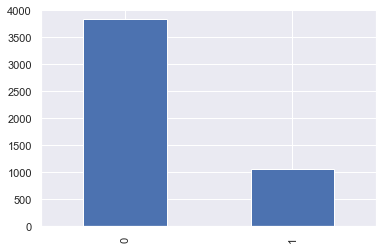

In [9]:
# visualisation plot
df['quality'].value_counts().plot(x=df['quality'], kind='bar')

* ### Resampling of an imbalanced dataset

In [10]:
# class count
class_0_count, class_1_count =df['quality'].value_counts()

# divide by class
class_0 = df[df.quality == 0]
class_1 = df[df.quality == 1]

* ### Random under-sampling of an imbalanced dataset

<AxesSubplot:>

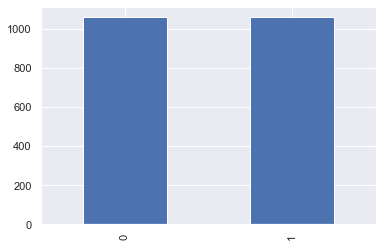

In [11]:
class_0_under = class_0.sample(class_1_count)
df_under = pd.concat([class_0_under, class_1], axis=0)
df_under['quality'].value_counts().plot(x=df_under['quality'], kind='bar')

* ### Random over-sampling of an imbalanced dataset

<AxesSubplot:>

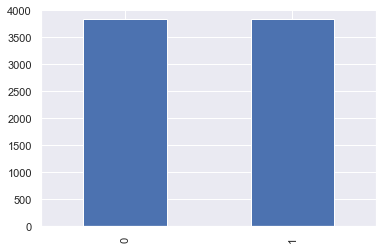

In [12]:
class_1_over = class_1.sample(class_0_count, replace=True)
df_over = pd.concat([class_0, class_1_over], axis=0)
df_over['quality'].value_counts().plot(x=df_over['quality'], kind='bar')

* ### Initialisation of target

In [13]:
target = df['quality']
target_under = df_under['quality']
target_over = df_over['quality']

* ### Drop column 'quality'

In [14]:
dataset = df.drop(['quality'], axis=1).copy()
dataset_under = df_under.drop(['quality'], axis=1).copy()
dataset_over = df_over.drop(['quality'], axis=1).copy()

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [15]:
# StandardScaler 
st_sc = StandardScaler()

dataset_st = st_sc.fit_transform(dataset)
dataset_st = pd.DataFrame(dataset_st)
dataset_st.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [16]:
st_sc = StandardScaler()
dataset_under_st = st_sc.fit_transform(dataset_under)
dataset_under_st = pd.DataFrame(dataset_under_st)
dataset_under_st.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.120842,-0.548675,1.500499,0.175202,0.943190,0.910517,0.828907,0.684349,2.253008,0.053298,-0.399630
1,0.490605,-1.268375,0.464753,-0.971729,-0.262964,-1.043934,-0.607409,-0.573058,-0.071780,-0.526570,0.206670
2,-0.248922,-0.651489,-0.382675,-0.853081,-0.841919,-0.005632,-0.161656,-0.532192,1.123825,-0.112379,0.282457
3,-0.988448,-0.343046,0.088118,-1.011279,-0.359457,1.032670,1.225132,-0.802535,1.588783,-0.443731,0.471926
4,0.490605,1.918870,3.007039,0.847541,0.315990,2.498508,1.423244,1.281617,-0.271048,-0.609408,-1.612231


In [17]:
st_sc = StandardScaler()
dataset_over_st = st_sc.fit_transform(dataset_over)
dataset_over_st = pd.DataFrame(dataset_over_st)
dataset_over_st.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247899,-0.036925,0.270581,3.017307,0.098470,0.611606,0.918285,2.484988,-1.284286,-0.378876,-1.538691
1,-0.619437,0.266975,0.085862,-0.913282,0.308212,-1.328347,-0.039466,0.176577,0.656963,-0.049758,-1.010022
2,1.610855,0.064375,0.640018,0.177405,0.360647,-0.327081,-0.921604,0.539327,0.398130,-0.461155,-0.556878
3,0.495709,-0.442125,-0.098857,0.506669,0.780131,0.736764,1.321548,0.704214,-0.054828,-0.790273,-0.707926
4,0.495709,-0.442125,-0.098857,0.506669,0.780131,0.736764,1.321548,0.704214,-0.054828,-0.790273,-0.707926


* ### Creating datasets for ML part

In [18]:
# set 'X' for features' and y' for the target ('quality').
X = dataset_st.copy()
y = target

# for under-sampling dataset 
X_under = dataset_under_st.copy()
y_under = target_under

# for over-sampling dataset 
X_over = dataset_over_st.copy()
y_over = target_over

In [19]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


* ### 'Train\Test' split

In [20]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, 
                                                                            random_state=0)

In [22]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

In [23]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((3918, 11), (3918,))

In [24]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((980, 11), (980,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [25]:
# Logistic Regression
LR = LogisticRegression()

# K-Nearest Neighbors
KNN = KNeighborsClassifier()

# Decision Tree
DT = DecisionTreeClassifier(random_state=42)

In [26]:
LR.fit(X_train, y_train)
LR_preds = LR.predict(X_test)

LR.fit(X_train_under, y_train_under)
LR_preds_under = LR.predict(X_test_under)

LR.fit(X_train_over, y_train_over)
LR_preds_over = LR.predict(X_test_over)

In [27]:
KNN.fit(X_train, y_train)
KNN_preds = KNN.predict(X_test)

KNN.fit(X_train_under, y_train_under)
KNN_preds_under = KNN.predict(X_test_under)

KNN.fit(X_train_over, y_train_over)
KNN_preds_over = KNN.predict(X_test_over)

In [28]:
DT.fit(X_train, y_train)
DT_preds = DT.predict(X_test)

DT.fit(X_train_under, y_train_under)
DT_preds_under = DT.predict(X_test_under)

DT.fit(X_train_over, y_train_over)
DT_preds_over = DT.predict(X_test_over)

* ### Classification report

In [29]:
print('No Sampling \n')
print("LR Classification Report: \n", class_rep(y_test, LR_preds, digits = 6))
print("KNN Classification Report: \n", class_rep(y_test, KNN_preds, digits = 6))
print("DT Classification Report: \n", class_rep(y_test, DT_preds, digits = 6))

No Sampling 

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.815611  0.943717  0.875000       764
           1   0.552083  0.245370  0.339744       216

    accuracy                       0.789796       980
   macro avg   0.683847  0.594544  0.607372       980
weighted avg   0.757527  0.789796  0.757025       980

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.873918  0.925393  0.898919       764
           1   0.666667  0.527778  0.589147       216

    accuracy                       0.837755       980
   macro avg   0.770293  0.726585  0.744033       980
weighted avg   0.828238  0.837755  0.830643       980

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.901682  0.912304  0.906962       764
           1   0.676329  0.648148  0.661939       216

    accuracy                       0.854082       980
   macro avg   0.789005  0.78

In [30]:
print('Under Sampling \n')
print("LR Classification Report: \n", class_rep(y_test_under, LR_preds_under, digits = 6))
print("KNN Classification Report: \n", class_rep(y_test_under, KNN_preds_under, digits = 6))
print("DT Classification Report: \n", class_rep(y_test_under, DT_preds_under, digits = 6))

Under Sampling 

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.776699  0.720721  0.747664       222
           1   0.715596  0.772277  0.742857       202

    accuracy                       0.745283       424
   macro avg   0.746148  0.746499  0.745260       424
weighted avg   0.747589  0.745283  0.745374       424

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.765957  0.648649  0.702439       222
           1   0.669492  0.782178  0.721461       202

    accuracy                       0.712264       424
   macro avg   0.717724  0.715413  0.711950       424
weighted avg   0.720000  0.712264  0.711501       424

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.826531  0.729730  0.775120       222
           1   0.736842  0.831683  0.781395       202

    accuracy                       0.778302       424
   macro avg   0.781686  0

In [31]:
print('Over Sampling \n')
print("LR Classification Report: \n", class_rep(y_test_over, LR_preds_over, digits = 6))
print("KNN Classification Report: \n", class_rep(y_test_over, KNN_preds_over, digits = 6))
print("DT Classification Report: \n", class_rep(y_test_over, DT_preds_over, digits = 6))

Over Sampling 

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.738162  0.691906  0.714286       766
           1   0.711491  0.755844  0.732997       770

    accuracy                       0.723958      1536
   macro avg   0.724827  0.723875  0.723642      1536
weighted avg   0.724792  0.723958  0.723666      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.917981  0.759791  0.831429       766
           1   0.796009  0.932468  0.858852       770

    accuracy                       0.846354      1536
   macro avg   0.856995  0.846129  0.845140      1536
weighted avg   0.856836  0.846354  0.845176      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.975110  0.869452  0.919255       766
           1   0.882767  0.977922  0.927911       770

    accuracy                       0.923828      1536
   macro avg   0.928938  0.

* ### Confusion matrix

In [32]:
from columnar import columnar

data = [
    ['', 'No Sampling', 'Under Sampling', 'Over Sampling'],
    ['LR Matrix', conf_matr(y_test, LR_preds),conf_matr(y_test_under, LR_preds_under),conf_matr(y_test_over, LR_preds_over)],
    ['','','',''],
    ['KNN Matrix', conf_matr(y_test, KNN_preds), conf_matr(y_test_under, KNN_preds_under), conf_matr(y_test_over, KNN_preds_over)],
    ['','','',''],
    ['DT Matrix', conf_matr(y_test, DT_preds), conf_matr(y_test_under, DT_preds_under), conf_matr(y_test_over, DT_preds_over)]
]

table = columnar(data, no_borders=True)
print(table)

          
              No Sampling  Under Sampling  Over Sampling  
  LR Matrix   [[721  43]   [[160  62]      [[530 236]     
               [163  53]]   [ 46 156]]      [188 582]]    
                                                          
  KNN Matrix  [[707  57]   [[144  78]      [[582 184]     
               [102 114]]   [ 44 158]]      [ 52 718]]    
                                                          
  DT Matrix   [[697  67]   [[162  60]      [[666 100]     
               [ 76 140]]   [ 34 168]]      [ 17 753]]    



* ### ROC-AUC score

In [33]:
data = [
    ['', 'No Sampling', 'Under Sampling', 'Over Sampling'],
    ['LR roc-auc', roc_auc_score(y_test, LR_preds),roc_auc_score(y_test_under, LR_preds_under),roc_auc_score(y_test_over, LR_preds_over)],
    ['','','',''],
    ['KNN roc-auc', roc_auc_score(y_test, KNN_preds), roc_auc_score(y_test_under, KNN_preds_under),roc_auc_score(y_test_over, KNN_preds_over)],
    ['','','',''],
    ['DT roc-auc', roc_auc_score(y_test, DT_preds), roc_auc_score(y_test_under, DT_preds_under),roc_auc_score(y_test_over, DT_preds_over)]
]

table = columnar(data, no_borders=True)
print(table)

          
               No Sampling         Under Sampling      Over Sampling       
  LR roc-auc   0.5945438239286408  0.7464989742217465  0.7238750805330441  
                                                                           
  KNN roc-auc  0.7265852239674229  0.7154134332352154  0.8461293275914685  
                                                                           
  DT roc-auc   0.7802259065348071  0.7807064490232807  0.9236868875250077  



Лучший набор данных - oversampling, лучшая модель - DecisionTree. Далее попробуем настроить гиперпараметры для всех трех моделей, но только на наборе oversampling.

* ### Build, train and evaluate models with hyperparameters

In [34]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'C':range(1, 12, 1), 
             'fit_intercept':[False],
             'random_state':[0],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
LR_best = GridSearchCV(LR, param_grid = LR_params, n_jobs=-1)
LR_best.fit(X_train_over, y_train_over)
print('LR гиперпараметры: \n', LR_best.best_params_)
LR_preds = LR_best.predict(X_test_over)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was re

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='non

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='non

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='non

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='non

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='non

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was re

LR гиперпараметры: 
 {'C': 5, 'fit_intercept': False, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}


In [35]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':range(5, 15, 2),
             'weights':['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':range(30, 60, 10)}
KNN_best = GridSearchCV(KNN, param_grid = KNN_params, n_jobs=-1)             
KNN_best.fit(X_train_over, y_train_over)
print('KNN гиперпараметры: \n', KNN_best.best_params_)
KNN_preds_over = KNN_best.predict(X_test_over)

KNN гиперпараметры: 
 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [36]:
# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'criterion':['gini', 'entropy'],
             'splitter':['best', 'random'], 
             'max_depth':range(5, 35, 5),
             'max_features':['auto', 'sqrt','log2'], 
             'random_state':[0]}
DT_best = GridSearchCV(DT, param_grid = DT_params, n_jobs=-1)
DT_best.fit(X_train_over, y_train_over)
print('DT гиперпараметры: \n', DT_best.best_params_)
DT_preds_over = DT_best.predict(X_test_over)

DT гиперпараметры: 
 {'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'random_state': 0, 'splitter': 'best'}


In [37]:
print('LR params  ', LR_best.best_params_)
print('KNN params ', KNN_best.best_params_)
print('DT params  ', DT_best.best_params_)

LR params   {'C': 5, 'fit_intercept': False, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
KNN params  {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}
DT params   {'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'random_state': 0, 'splitter': 'best'}


* ### Classification report

In [38]:
print('Over Sampling \n')
print("LR Classification Report: \n", class_rep(y_test_over, LR_preds_over, digits = 6))
print("KNN Classification Report: \n", class_rep(y_test_over, KNN_preds_over, digits = 6))
print("DT Classification Report: \n", class_rep(y_test_over, DT_preds_over, digits = 6))

Over Sampling 

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.738162  0.691906  0.714286       766
           1   0.711491  0.755844  0.732997       770

    accuracy                       0.723958      1536
   macro avg   0.724827  0.723875  0.723642      1536
weighted avg   0.724792  0.723958  0.723666      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.987179  0.804178  0.886331       766
           1   0.835526  0.989610  0.906064       770

    accuracy                       0.897135      1536
   macro avg   0.911353  0.896894  0.896198      1536
weighted avg   0.911155  0.897135  0.896223      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.977044  0.889034  0.930964       766
           1   0.898689  0.979221  0.937228       770

    accuracy                       0.934245      1536
   macro avg   0.937867  0.

Лучшей моделью остается DecisionTree.

* ### Confusion matrix

DT Confusion Matrix, Over Sampling


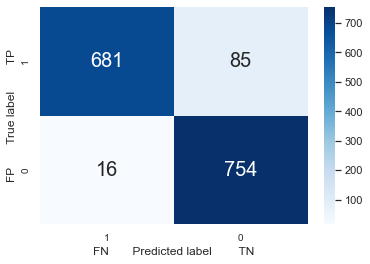

In [39]:
# confusion matrix of DT model
conf_matrix =  conf_matr(y_test_over, DT_preds_over)
print('DT Confusion Matrix, Over Sampling')

# visualisation
ax = plt.subplot()
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, annot_kws = {'size': 20})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()

* ### ROC-AUC score

In [40]:
roc_auc_DT = roc_auc_score(y_test_over, DT_preds_over)
roc_auc_DT

0.9341273608897631

##  Conclusion

In [41]:
# submission of .csv file with predictions
submission_data = pd.DataFrame()
submission_data['ID'] = X_test_over.index
submission_data['Quality'] = DT_preds_over
submission_data.to_csv('WineQualityPredictions.csv', index=False)

**Question**: Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

**Answers**:

1. Binary classification was applied.

2. Classes were highly imbalanced with 78.36 % of '0' class and only 21.64 % of '1' class in our dataset. 

3. Three options were applied in order to calculate the best predictions:
    * Calculate predictions with imbalanced dataset
    * Calculate predictions with random undersampling technique of an imbalanced dataset
    * Calculate predictions with random oversampling technique of an imbalanced dataset
    
4. Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyper parameters).

5. The best result was choosen: 
    * Random over-sampling dataset with 3838 enteties in class '0' and 3838 enteties in class '1', 7676 enteties in total.
    * Train/Test split: test_size=0.2, random_state=0
    * Decision Tree model:
    1. with hyper parameters tuning - 'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'random_state': 0, 'splitter': 'best'
    2. with an accuracy score equal 0.934245
    3. ROC-AUC score equal 0.934127.